REGRESIÓN LINEAL SIMPLE

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline 

In [4]:
# Leo los datos

df = pd.read_csv("/content/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd63505a90>,
      dtype=object)

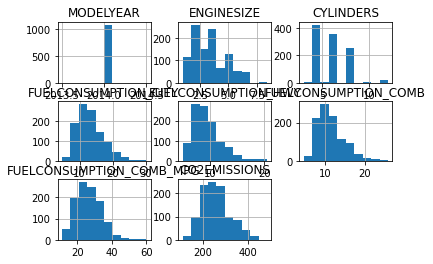

In [6]:
df.hist()

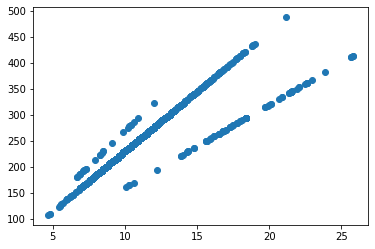

In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)

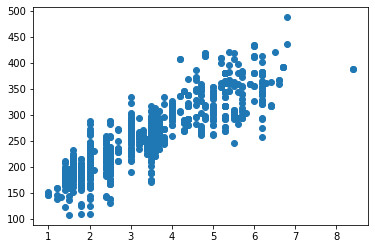

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)

In [9]:
# Obtenemos la correlación, y es bastante alta!

np.corrcoef(cdf.ENGINESIZE, cdf.CO2EMISSIONS)

array([[1.        , 0.87415437],
       [0.87415437, 1.        ]])

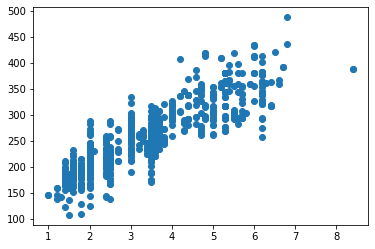

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)

In [16]:
## Construimos el modelo

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regresion = linear_model.LinearRegression()

regresion.fit(train_x,train_y)

print("coeficientes: ", regresion.coef_)
print("intercepto: ", regresion.intercept_)

coeficientes:  [[38.60847124]]
intercepto:  [126.42159479]


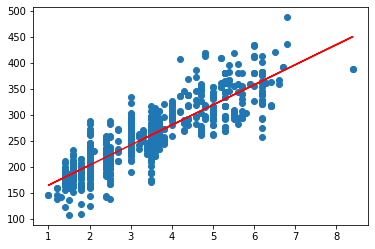

In [19]:
# Dibujo el modelo obtenido

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regresion.coef_[0][0]*train_x + regresion.intercept_[0], '-r')

In [23]:
# Obtenemos las métricas

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regresion.predict(test_x)

r2_score(test_y,test_y_)

0.7613483003717519

REGRESIÓN LINEAL MÚLTIPLE

In [24]:
## Construimos el modelo

train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regresion = linear_model.LinearRegression()

regresion.fit(train_x,train_y)

print("coeficientes: ", regresion.coef_)
print("intercepto: ", regresion.intercept_)

coeficientes:  [[10.17242223  7.70541555  9.85440313]]
intercepto:  [63.42957087]


In [27]:
# Obtenemos las métricas

test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regresion.predict(test_x)

r2_score(test_y,test_y_)
regresion.score(test_x, test_y)

0.8616512211945961

EJERCICIO: CONSTRUIR EL MODELO DE REGRESIÓN LINEAL MÚLTIPLE QUE PREDIGA LAS EMISIONES EN FUNCION DE EL TAMAÑO DEL MOTOR, EL NÚMERO DE CILINDROS, EL CONSUMO EN CIUDAD Y EL CONSUMO EN HWY.
